[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<Response [200]>
200 OK
<!DOCTYPE html>
<html class="no-js" lang="en"><head><!-- OneTrust Cookies Consent Notice start for npr.org -->
<script src="https://cdn.cookielaw.org/consent/82089dfe-410c-4e1b-a7f9-698174b62a86/OtAutoBlock.js" type="text/javascript"></script>
<script charset="UTF-8" data-domain-script="82089dfe-410c-4e1b-a7f9-698174b62a86" src="https://cdn.cookielaw.org/scripttemplates/otSDKStub.js" type="text/javascript"></script>
<script type="text/javascript">
function OptanonWrapper() {
    OneTrust.OnConsentChanged(function() {
        document.dispatchEvent(new CustomEvent('npr:DataConsentChanged'));
    });
 }
</script>
<!-- OneTrust Cookies Consent Notice end for npr.org -->
<script ccpa-opt-out-geo="us" ccpa-opt-out-ids="C0004" ccpa-opt-out-lspa="false" charset="UTF-8" src="https://cdn.cookielaw.org/opt-out/otCCPAiab.js" type="text/javascript"></script><script>
(function (e, o, n, i) {
    if (!e) {
        e = e || {}, window.permutive = e, e.q = [];
        var t = f

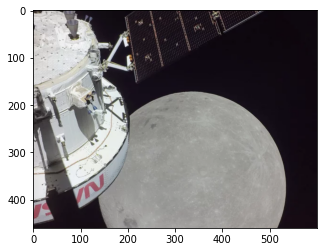

In [76]:
# Import all relevant files and libraries: 


import requests 
from bs4 import BeautifulSoup
import spacy
import nltk 
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


 # The last two imports seen above allow for lemmatization and creates an engine
 
# Webscraping here( Optional): 

url = 'https://www.npr.org/2022/12/07/1139665381/50-years-since-the-last-apollo-astronauts-went-to-the-moon-nasa-is-finally-going'
response = requests.get(url)
print(response); print(response.status_code, response.reason)
# Everything checked out. 
soup = BeautifulSoup(response.text)
print(soup)
# You can just select what you want to pull from. 

# Our hand coded dataset- I cleaned it up a little bit for readability reasons. 

data = """Protected inside a glass case are some precious boots. Technically
called astronaut "overshoes," they seem perfectly preserved, almost pristine.
But a closer look reveals bits of gray lunar dust embedded in the white fabric.
These overshoes made the last human footprints in that gray dust, almost a 
half-century ago."They look like, you know, the winter moon boots that you've
seen," says Teasel Muir-Harmony, curator of the Apollo collection at the
Smithsonian's National Air and Space Museum, where this footwear is on display. 
"Yet they have those traces of the experience of walking on the lunar surface."
Fifty years ago, on December 7, 1972, a powerful Saturn V rocket blasted off 
carrying three astronauts, including Apollo 17 Commander Eugene Cernan, 
who wore those overshoes.He knew that his crew would be the last lunar visitors
for some time to come —but he had no idea how much time would pass. Now, as 
NASA commemorates the anniversary of its Apollo program's final mission, 
it's closer than ever to returning astronauts to the lunar surface.
Its new, multi-billion-dollar moon rocket launched for the first time last 
month, sending up a crew capsule — with no astronauts on board —
that's currently on its way home from a test flight around the moon. 
The spacecraft, called Orion, is due to splash down in the Pacific on
December 11. If all goes well, NASA expects to fly astronauts on a trip around 
the moon in 2024. And soon after, the agency intends to take astronauts to the
surface in a lunar lander being built by Elon Musk's company SpaceX. Although 
2025 is the agency's target date for a landing near the lunar South Pole, most
in the aerospace industry expect delays. NASA has vowed that this
time around, moonwalkers will include a woman and a person of color. 
Apollo 17's historic weightOn December 14, 1972, at the end of the final
moonwalk of the Apollo 17 mission, Cernan spoke a few words from the
surface of the moon before following astronaut Harrison Schmitt up a ladder
into their ascent vehicle. "We leave as we came, and, God willing, we
shall return, with peace and hope for all mankind," said Cernan. Being
"the last man on the moon" was Cernan's claim to fame, but he seemed eager
to shed the title."I'd like to be able to shake the hand of that young man or 
young woman who replaces me in that category," he told NPR in 2012, 
before his death five years later. "But unfortunately, the way things have gone
and the way things are looking for the future, at least the near-term future,
that won't happen in my lifetime." Only a dozen people have ever walked on the
moon. During the three days they spent on its surface, 
Schmitt and Cernan traveled for over twenty miles, while crewmate
Ronald Evans orbited above in a command module. "They knew the 
historic weight of that mission," says Muir-Harmony, who notes
that other Apollo astronauts abandoned their overshoes on the moon, to avoid 
carrying too much cargo home other than lunar rocks. But Cernan packed his for
the return trip. Another thing the astronauts brought home, and one of the most
important legacies of the Apollo 17 mission, was a photograph of the entire
round globe of the Earth, looking like a blue marble."That image was taken up
by the environmental movement. It was on the Whole Earth Catalog," 
says Muir-Harmony, referring to the influential counterculture 
publication launched in 1968. "It's one of the most reproduced images in
history." "Apollo wasn't very popular"Like the majority of Americans alive now,
Muir-Harmony isn't old enough to remember the days of moonwalking,
which ended before she was born.Her museum has just created a new 
lunar exploration hall, and it has to tell the story of the Apollo
program to people with no personal memories of it.
Back in the 1960's and 1970's, she notes, the Apollo 
program didn't have a tremendous amount of public support. 
"In general, Apollo wasn't very popular domestically," explains Muir-Harmony. 
"It was only around the Apollo 11 mission that more than half of Americans
thought this should be a national priority."Many Americans resented the money
devoted to moon exploration, and the nation also faced pressing challenges like
the Vietnam War. Muir-Harmony notes that "major developments" in that war
were happening during the Apollo 17 mission and generating competing headlines.
She says the Apollo program ended because politicians like 
President Richard Nixon were no longer willing to shoulder its high costs and
the risks to astronauts, given that the Cold War's race to the moon had been 
won.NASA shifted to building reusable space shuttles. 
These vehicles flew for three decades and made it possible to construct the
International Space Station, which is occupied 24/7 and orbits about 250 miles
above the Earth. But all of that work kept astronauts close to home,
rather than going back to the moon or on to Mars. 
President George H. W. Bush proposed a return to the moon,
and President George W. Bush did as well. But each time, support waned
when a new administration came in with a different agenda.That hasn't been true
for NASA's current moonshot, which the agency calls Artemis, after the mythical 
Apollo's twin sister. "One of the things that bodes very well for Artemis," 
says Muir-Harmony, "is that this is a program that has had sustained support
through multiple administrations."And even though humans have already walked on
the moon, she says it's hard to predict what effect a moon landing would have 
on younger Americans seeing it for the first time. During the Apollo 11 landing,
basically everyone on Earth stopped what they were doing to watch, 
coming together "in greater numbers than ever before in human history," 
she points out. "What would it mean to feel like a participant today?"
"""
print(data) 

nlp = spacy.load("en_core_web_sm", disable= ["parser", "ner"])

# Seperate the above text using tokenizer: 

print([str(token) for token in nlp(data) if not token.is_punct])

# Removed all punctuation: 

words = [str(token) for token in nlp(data)if not token.is_punct]


# Removed all unnecessary words; these are also known as stopwords. 

print(stopwords.words("english"))
filtered_The_List = []
stop_words = nltk.corpus.stopwords.words('english')

# Tokenized the sentence 

words_Needed = word_tokenize(data)
for w in words_Needed: 
  if w.lower() not in stop_words: 
    filtered_The_List.append(w)
print(filtered_The_List)

# Text Vectorization: 

texts1 = words
Vectorizer1 = TfidfVectorizer(stop_words = 'english')
Vectorizer1.fit(texts1)
vector = Vectorizer1.transform(texts1)

# Our output of vectorization:

print("List of Unique Words:", Vectorizer1.vocabulary_)
print("Shape of the sparse matrix we are utilizing", vector.shape)
print(vector.toarray())


# Read in Images - Optional: 

image1 = cv2.imread("/content/Nasa Image.png")
image2 = cv2.imread("/content/Nasa Image2.png")
image3 = cv2.imread("/content/Nasa Image3.png")
image4 = cv2.imread("/content/Nasa Image4.png")
image5 = cv2.imread("/content/Nasa Image5.png")
image6 = cv2.imread("/content/Nasa Image6.png")

# Using Matplot: 

image1 = mpimg.imread("/content/Nasa Image.png")
image2 = mpimg.imread("/content/Nasa Image2.png")
image3 = mpimg.imread("/content/Nasa Image3.png")
image4 = mpimg.imread("/content/Nasa Image4.png")
image5 = mpimg.imread("/content/Nasa Image5.png")
image6 = mpimg.imread("/content/Nasa Image6.png")

plt.imshow(image1); plt.imshow(image2); plt.imshow(image3)
plt.imshow(image4); plt.imshow(image5); plt.imshow(image6)


Problems encountered: 

1. Had to change the list to a multiple line string in order for tokenization to work. 
2. Out of date library instructions. Find workarounds.
3. Had a little difficulty in removing the stopwords. 